In [7]:
# Calculate formation energy 
from pyiron import Project, ase_to_pyiron
import matplotlib.pyplot as plt
import numpy as np
from pyiron import Project
from ase.io import read, write
from pyiron import ase_to_pyiron
import ase
import os
import time
%ls

AIMD_pyiron.ipynb*  pyiron.log*


In [8]:
pr = Project("/nfshome/deshmukh/pyiron/projects/NASICON/project/hena/hena_1/minimization_small")
pr_1 = Project("/nfshome/deshmukh/pyiron/projects/NASICON/project/hena/hena_2_2/minimization_small")   

In [15]:
strct_no = [44, 50, 34] #, 26, 4, 42, 46, 45, 38, 17, 21] 
strct_no_1 = [82, 139,  34,  23,  26] #, 26, 4, 42, 46, 45, 38, 17, 21]
strct_no_2 = [74,   2,  63, 112, 117] #, 26, 4, 42, 46, 45, 38, 17, 21]
temp = [523, 573, 623, 673, 723, 773]


In [16]:
# Analyse the energy 
en = []
for i in strct_no:
    job = pr['hena_1_struct_mini_%s'%i]
    atom = len(job.get_final_structure())
    en.append(job['output/generic/energy_tot'][-1]/atom)


/tmp/ipykernel_4102271/3163531724.py:5: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  atom = len(job.get_final_structure())
2023-05-20 20:59:08,559 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2023-05-20 20:59:08,589 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2023-05-20 20:59:08,618 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype=

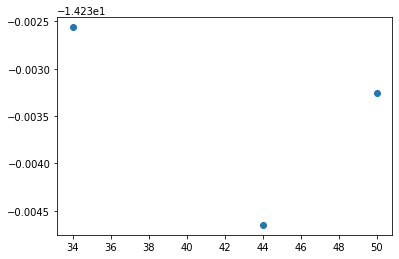

In [17]:
plt.plot(strct_no, en, 'o')

In [18]:
en_2 = []
for i in strct_no_1:
    job = pr_1['hena_2_1_struct_mini_%s'%i]
    atom = len(job.get_final_structure())
    en_2.append(job['output/generic/energy_tot'][-1]/atom)

/tmp/ipykernel_4102271/3393919357.py:4: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  atom = len(job.get_final_structure())
2023-05-20 20:59:12,817 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2023-05-20 20:59:12,846 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2023-05-20 20:59:12,876 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype=

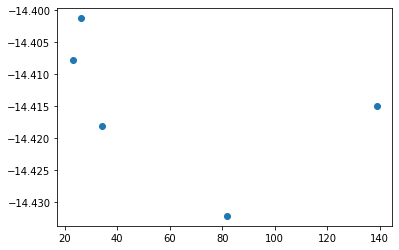

In [19]:
plt.plot(strct_no_1, en_2, 'o')

In [21]:
en_3 = []
for i in strct_no_2:
    job = pr_1['hena_2_1_struct_mini_%s'%i]
    atom = len(job.get_final_structure())
    en_3.append(job['output/generic/energy_tot'][-1]/atom)

/tmp/ipykernel_4102271/1063779799.py:4: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  atom = len(job.get_final_structure())
2023-05-20 21:00:00,314 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2023-05-20 21:00:00,345 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2023-05-20 21:00:00,375 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype=

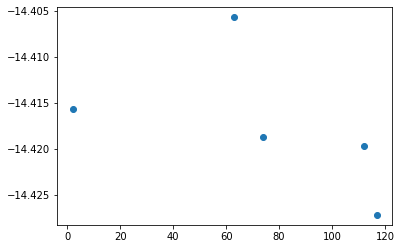

In [22]:
plt.plot(strct_no_2, en_3, 'o')

In [13]:
for k in strct_no:
    for j,i in zip(temp,range(len(temp))):
        job_mini = pr['hena_1_struct_mini_%s'%k]               # Bulk Crystal
    
        # Get last structure    
        struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
    
        j = pr.create.job.Vasp("hena_1_crystal_small_%s_%sk"%(k,j), delete_existing_job=True)
        j.calc_md(temperature=temp[i], n_ionic_steps=25000, n_print=1, time_step=1.0)     # AIMD simulations        
        j.structure = struct_nvt                               # Intial structure   
        j.set_kpoints(scheme="GC")  
        j.input.kpoints.set_kpoints_file(size_of_mesh=['1 1 1'])
        j.set_exchange_correlation_functional("PBE")           # GGA (PBE) potential, also need to test SCAN, rSCAN, r2SCAN     

        #Select PAW potentials 
        #j.list_potentials()
        j.potential.Si = "Si"                                  # 4 valence electron, EMAX = 245 (eV)
        j.potential.P = "P"                                    # 5 valence electron, EMAX = 255 (eV) 
        j.potential.O = "O"                                    # 6 valence electron, EMAX = 400 (eV)   
        j.potential.Na = "Na"                                  # 7 valence electron with 'p' orbitals, EMAX = 260 (eV) 
        j.potential.Zr = "Zr_sv"                               # 12 valence electron with 's' orbitals, EMAX = 230 (eV)  

        # Edit INCAR file 
        j.input.incar["SMASS"] = 0                             # For noose hover algo     
        j.input.incar["MDALGO"] = 2                            # Nose-Hoover thermostat              
        j.input.incar["PREC"] = "Normal"
        j.input.incar["IBRION"] = 0                            # Conjugate gradient method, det. how the ions are updated and moved (remove if ions are not present)  
        j.input.incar["ISMEAR"] = 0                            # O = Gaussian, -1 = Fermi for AIMD 
        j.input.incar["LREAL"] = "A"                           # Projecion in real or reciprocal space   
        j.input.incar["SIGMA"] = 0.05                          # 0.03 or 0.05 for gaussian (1)  ----- Conv
        j.input.incar["EDIFF"] = 1e-5                          # Global break condition, accurate cal = 1e-8 (2) -- Conv 
        j.input.incar["ALGO"] = 'Normal'                       # For convergence use Fast else Normal
        # Paralellization 
        j.input.incar["ISYM"] = 0                              # no symmetry
        j.input.incar["MAXMIX"] = 40                           # reuse mixer from one MD step to next
        j.input.incar["NELMIN"] = 4                            # number of electronic steps
        j.input.incar["NCORE"] = 12                            # Core for calculations  
        #j.input.incar["KPAR"] = 12                            # No of K-points treated in parallel, must be divi to IBZKPT  
        j.server.cores = 192
        j.executable.executable_path = '/home/vd80naku/pyiron/resources/vasp/bin/run_vasp_6.1.2_default_mpi_gamma.sh'
        j.server.queue = "vasp_l_l2"
        j.run()

/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:57:17,142 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:57:17,188 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:57:17,220 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_44_523k was saved and received the ID: 13047


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 199.31it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:57:26,341 - pyiron_log - INFO - job: hena_1_crystal_small_44_523k id: 1, status: initialized, submitted: queue id 31642046

  warnings.warn(stderr.read().decode())


Queue system id:  31642046


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:57:27,259 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:57:27,291 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:57:27,319 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_44_573k was saved and received the ID: 13048


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 203.15it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:57:36,213 - pyiron_log - INFO - job: hena_1_crystal_small_44_573k id: 2, status: initialized, submitted: queue id 31642049

  warnings.warn(stderr.read().decode())


Queue system id:  31642049


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:57:37,126 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:57:37,168 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:57:37,197 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_44_623k was saved and received the ID: 13049


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 194.31it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:57:45,968 - pyiron_log - INFO - job: hena_1_crystal_small_44_623k id: 3, status: initialized, submitted: queue id 31642056

  warnings.warn(stderr.read().decode())


Queue system id:  31642056


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:57:46,909 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:57:46,939 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:57:46,971 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_44_673k was saved and received the ID: 13050


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 198.95it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:57:55,795 - pyiron_log - INFO - job: hena_1_crystal_small_44_673k id: 4, status: initialized, submitted: queue id 31642057

  warnings.warn(stderr.read().decode())


Queue system id:  31642057


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:57:56,766 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:57:56,797 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:57:56,834 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_44_723k was saved and received the ID: 13051


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 206.54it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:58:05,873 - pyiron_log - INFO - job: hena_1_crystal_small_44_723k id: 5, status: initialized, submitted: queue id 31642059

  warnings.warn(stderr.read().decode())


Queue system id:  31642059


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:58:06,867 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:58:06,901 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:58:06,933 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_44_773k was saved and received the ID: 13052


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 164.92it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:58:15,766 - pyiron_log - INFO - job: hena_1_crystal_small_44_773k id: 6, status: initialized, submitted: queue id 31642065

  warnings.warn(stderr.read().decode())


Queue system id:  31642065


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:58:16,717 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:58:16,748 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:58:16,780 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_50_523k was saved and received the ID: 13053


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 195.52it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:58:25,888 - pyiron_log - INFO - job: hena_1_crystal_small_50_523k id: 7, status: initialized, submitted: queue id 31642069

  warnings.warn(stderr.read().decode())


Queue system id:  31642069


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:58:26,852 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:58:26,884 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:58:26,913 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_50_573k was saved and received the ID: 13054


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 201.02it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:58:36,074 - pyiron_log - INFO - job: hena_1_crystal_small_50_573k id: 8, status: initialized, submitted: queue id 31642073

  warnings.warn(stderr.read().decode())


Queue system id:  31642073


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:58:37,034 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:58:37,068 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:58:37,098 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_50_623k was saved and received the ID: 13055


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 191.17it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:58:46,000 - pyiron_log - INFO - job: hena_1_crystal_small_50_623k id: 9, status: initialized, submitted: queue id 31642079

  warnings.warn(stderr.read().decode())


Queue system id:  31642079


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:58:46,936 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:58:46,966 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:58:46,995 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_50_673k was saved and received the ID: 13056


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 189.41it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:58:56,217 - pyiron_log - INFO - job: hena_1_crystal_small_50_673k id: 10, status: initialized, submitted: queue id 31642081

  warnings.warn(stderr.read().decode())


Queue system id:  31642081


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:58:57,245 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:58:57,275 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:58:57,304 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_50_723k was saved and received the ID: 13057


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 186.46it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:59:06,103 - pyiron_log - INFO - job: hena_1_crystal_small_50_723k id: 11, status: initialized, submitted: queue id 31642086

  warnings.warn(stderr.read().decode())


Queue system id:  31642086


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:59:07,016 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:59:07,045 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:59:07,074 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_50_773k was saved and received the ID: 13058


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 149.03it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:59:15,831 - pyiron_log - INFO - job: hena_1_crystal_small_50_773k id: 12, status: initialized, submitted: queue id 31642094

  warnings.warn(stderr.read().decode())


Queue system id:  31642094


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:59:16,750 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:59:16,780 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:59:16,809 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_34_523k was saved and received the ID: 13059


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 134.59it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:59:25,925 - pyiron_log - INFO - job: hena_1_crystal_small_34_523k id: 1, status: initialized, submitted: queue id 31642100

  warnings.warn(stderr.read().decode())


Queue system id:  31642100


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:59:26,904 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:59:26,934 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:59:26,974 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_34_573k was saved and received the ID: 13060


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 192.02it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:59:36,028 - pyiron_log - INFO - job: hena_1_crystal_small_34_573k id: 2, status: initialized, submitted: queue id 31642106

  warnings.warn(stderr.read().decode())


Queue system id:  31642106


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:59:36,984 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:59:37,013 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:59:37,042 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_34_623k was saved and received the ID: 13061


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 159.59it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:59:46,154 - pyiron_log - INFO - job: hena_1_crystal_small_34_623k id: 3, status: initialized, submitted: queue id 31642112

  warnings.warn(stderr.read().decode())


Queue system id:  31642112


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:59:47,178 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:59:47,207 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:59:47,240 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_34_673k was saved and received the ID: 13062


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 198.16it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 00:59:56,328 - pyiron_log - INFO - job: hena_1_crystal_small_34_673k id: 4, status: initialized, submitted: queue id 31642117

  warnings.warn(stderr.read().decode())


Queue system id:  31642117


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 00:59:57,246 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:59:57,279 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 00:59:57,318 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_34_723k was saved and received the ID: 13063


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 190.44it/s]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 01:00:06,284 - pyiron_log - INFO - job: hena_1_crystal_small_34_723k id: 5, status: initialized, submitted: queue id 31642118

  warnings.warn(stderr.read().decode())


Queue system id:  31642118


/tmp/ipykernel_657052/1274795633.py:6: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct_nvt = job_mini.get_structure(iteration_step=-1) # Last frame from minimization
2022-09-26 01:00:07,216 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 01:00:07,255 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-26 01:00:07,284 - pyiron_log - WARNING - Deprecated da

The job hena_1_crystal_small_34_773k was saved and received the ID: 13064


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 4/4 [00:00<00:00, 159.45it/s]


Queue system id:  31642123


/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 2022-09-26 01:00:16,290 - pyiron_log - INFO - job: hena_1_crystal_small_34_773k id: 6, status: initialized, submitted: queue id 31642123

  warnings.warn(stderr.read().decode())
